# МЕТОДИ ВИДОБУВАННЯ АСОЦІАТИВНИХ ПРАВИЛ З ВЕЛИКИХ МАСИВІВ ДАНИХ

1. Ознайомитися з конспектом лекцій та рекомендованою літературою за темою роботи, а також з додатком А, що містить опис програмного забезпечення для видобування асоціативних правил з великих масивів даних.
2. Сформувати набір даних для обробки та аналізу.
3. Розробити за допомогою середовища Matlab програмне забезпечення для видобування асоціативних правил з великих масивів даних або вивчити рекомендоване програмне забезпечення (пакет Armada модулю Matlab) та здійснити обробку набору даних з метою виділення асоціативних
правил.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
# https://www.kaggle.com/residentmario/iowa-liquor-sales

In [4]:
# для аналииза выберем действительно большой датасет (iowa_ from google bigquery public data)
df = pd.read_csv('complete_iowa_df.csv',low_memory=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5089270 entries, 0 to 5089269
Data columns (total 25 columns):
Unnamed: 0                 int64
invoice_and_item_number    object
date                       object
store_number               int64
store_name                 object
address                    object
city                       object
zip_code                   object
store_location             object
county_number              float64
county                     object
category                   float64
category_name              object
vendor_number              float64
vendor_name                object
item_number                float64
item_description           object
pack                       float64
bottle_volume_ml           float64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold               float64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtypes: float64(12), int64(

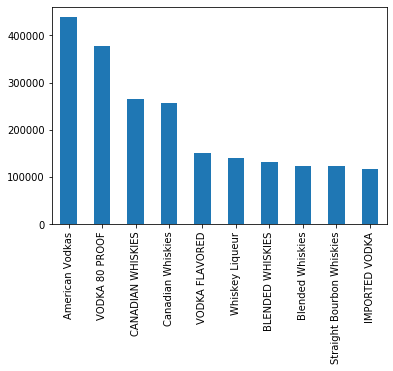

In [17]:
df['category_name'].value_counts().nlargest(10).plot.bar()